In [28]:
# Importing libraries required for handling the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing metrics library
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Importing libraries for preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Importing library for splitting the data
from sklearn.model_selection import train_test_split

# Importing regression models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Brianc482/731_Group_Project/main/Data/Brazil.csv")
df.head()

,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,PositionClass,Age_Ranges
0,Neymar Jr,26,Brazil,92,93,118500000.0,290000.0,2143,Right,5.0,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,Attacker,26-30
1,Casemiro,26,Brazil,88,90,59500000.0,285000.0,2170,Right,3.0,...,90.0,87.0,13.0,14.0,16.0,12.0,12.0,€126.4M,Midfielder,26-30
2,Coutinho,26,Brazil,88,89,69500000.0,340000.0,2175,Right,3.0,...,54.0,47.0,12.0,7.0,9.0,14.0,6.0,€147.7M,Attacker,26-30
3,Marcelo,30,Brazil,88,88,43000000.0,285000.0,2279,Left,4.0,...,85.0,86.0,12.0,5.0,5.0,5.0,9.0,€88.2M,Defender,26-30
4,Thiago Silva,33,Brazil,88,88,24000000.0,165000.0,2077,Right,4.0,...,89.0,85.0,9.0,12.0,5.0,9.0,10.0,€44.4M,Defender,31-35


In [3]:
df['Position'].value_counts()

ST     111
CAM     81
GK      68
LB      67
CB      66
RB      63
LCB     47
CDM     43
RCB     39
LM      30
LDM     25
RM      23
RDM     22
RW      21
CM      18
LCM     16
LS      15
RCM     15
LW      15
RAM     14
LAM     13
RS       8
CF       4
0        2
LF       1
Name: Position, dtype: int64

In [4]:
ageBins = [15, 21, 25, 30, 35, 40, 45]
ranges = ['16-21','22-25','26-30','31-35','36-40','41-45']
df['Age_Ranges'] = pd.cut(df['Age'], bins = ageBins, labels = ranges)
df['Age_Ranges'].value_counts()

26-30    403
31-35    179
22-25    166
16-21     72
36-40      7
41-45      0
Name: Age_Ranges, dtype: int64

In [5]:
maxEarners= df[['Name','Value', 'Wage']].nlargest(11,'Wage', keep = 'first')
maxEarners = maxEarners.set_index('Name')
maxEarners.head()

,Value,Wage
Name,,
Coutinho,69500000.0,340000.0
Neymar Jr,118500000.0,290000.0
Casemiro,59500000.0,285000.0
Marcelo,43000000.0,285000.0
Paulinho,37000000.0,235000.0


Text(0, 0.5, 'Wage')

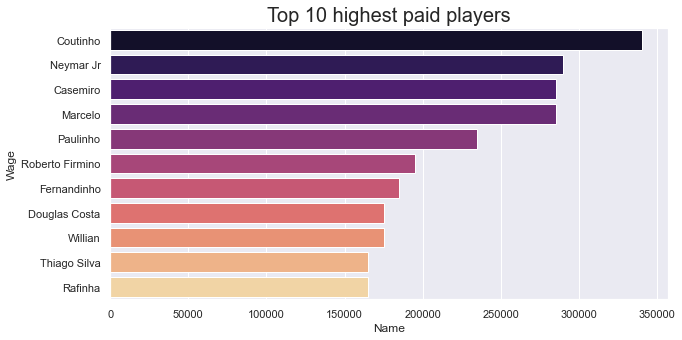

In [6]:
plt.figure(figsize=(10,5))
sns.set()
sns.barplot(x = maxEarners['Wage'], y = maxEarners.index,  palette = 'magma')
plt.title('Top 10 highest paid players', fontsize = 20)
plt.xlabel('Name', fontsize =12)
plt.ylabel('Wage', fontsize =12)

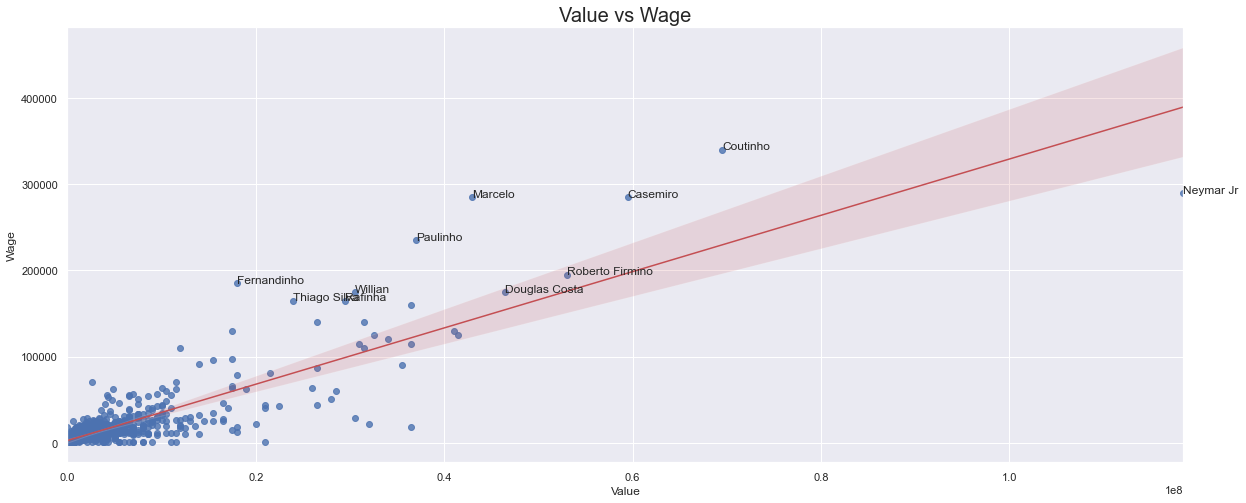

In [7]:
plt.figure(figsize=(20,8))
labels = maxEarners.index
ax = sns.regplot(x = 'Value', y = 'Wage' , data = df,
            line_kws={"color":"r","alpha":1,"lw":1.5})
plt.title('Value vs Wage', fontsize = 20)

for i, label in enumerate(labels):
    ax.annotate(label, (maxEarners['Value'][i],maxEarners['Wage'][i]))

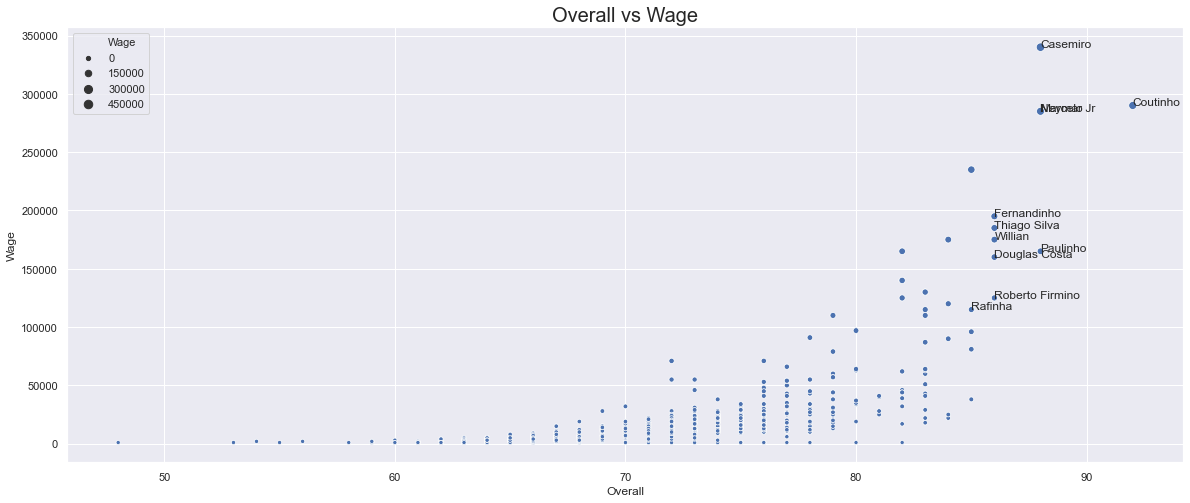

In [8]:
plt.figure(figsize=(20,8))
labels = maxEarners.index
ax = sns.scatterplot(x = 'Overall', y = 'Wage' , data = df, size='Wage')
plt.title('Overall vs Wage', fontsize = 20)

for i, label in enumerate(labels):
    ax.annotate(label, (df['Overall'][i],df['Wage'][i]))

Text(0.5, 1.0, 'Wage vs Position Class')

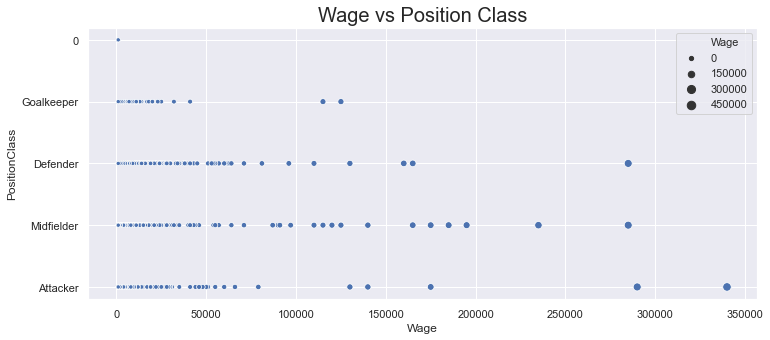

In [9]:
plt.figure(figsize=(12,5))
labels = maxEarners.index
ax = sns.scatterplot(x = 'Wage', y = 'PositionClass' , data = df,size='Wage')
plt.title('Wage vs Position Class', fontsize = 20)

In [10]:
cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Skill Moves','Dribbling', 'Curve',
      'FKAccuracy', 'LongPassing', 'BallControl', 'Agility', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
      'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Reactions', 'Aggression',
      'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle',
      'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
i=0
while i < len(cols):
    print('Best {0} : {1}'.format(cols[i],df.loc[df[cols[i]].idxmax()][0]))
    i += 1

Best Crossing : Marcelo
Best Finishing : Jonas
Best HeadingAccuracy : Naldo
Best ShortPassing : Coutinho
Best Volleys : Jonas
Best Skill Moves : Neymar Jr
Best Dribbling : Neymar Jr
Best Curve : Coutinho
Best FKAccuracy : Neymar Jr
Best LongPassing : Alex Telles
Best BallControl : Neymar Jr
Best Agility : Neymar Jr
Best Acceleration : Douglas Costa
Best SprintSpeed : Maicon
Best Agility : Neymar Jr
Best Reactions : Neymar Jr
Best Balance : Bernard
Best ShotPower : Hulk
Best Jumping : Charles
Best Stamina : Allan
Best Strength : Wesley
Best LongShots : Coutinho
Best Reactions : Neymar Jr
Best Aggression : Gazzolisco
Best Interceptions : Thiago Silva
Best Positioning : Neymar Jr
Best Vision : Coutinho
Best Penalties : Fabinho
Best Composure : Neymar Jr
Best Marking : Miranda
Best StandingTackle : Casemiro
Best SlidingTackle : Casemiro
Best GKDiving : Ederson
Best GKHandling : Raphaelito Anjos
Best GKKicking : Ederson
Best GKPositioning : Alisson
Best GKReflexes : Alisson


In [12]:
target = "Overall"
predictors = list(df.columns)
for r in [target,"Name","Age","Nationality","Position","Weak Foot","Preferred Foot", "Work Rate"]:
  predictors.remove(r)
#print(target,predictors)

In [13]:
def numColumns(col):
    if type(list(df[col])[0]) == float:
        return col

numberPreds = []

for c in df.columns:
    temp = numColumns(c)
    if temp != None:
        numberPreds.append(temp)

#numberPreds

In [15]:
scaler = StandardScaler()
numberPreds.append(target)
# print(predictors,target)
scaled_df = pd.DataFrame(data=scaler.fit_transform(df[numberPreds]),columns=numberPreds)

numberPreds.remove(target)

X = scaled_df[numberPreds]
y = scaled_df[target]

print(X.shape,y.shape)

(827, 40) (827,)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state= 1)
mlpReg = MLPRegressor(max_iter=225)
mlpReg.fit(X_train.values,y_train.values)

MLPRegressor(max_iter=225)

In [34]:
preds = mlpReg.predict(X_test)
score = r2_score(y_test,preds)
mae_mlp = mean_absolute_error(y_test,preds)
#0.0 is best possible score from MAE
print ('Mean-Absolute-Error: ', mae_mlp)
#This is the weighted variance in our calculations 1.0 is maximum
print('R2 score:', score)

Mean-Absolute-Error:  0.20506271221776803
R2 score: 0.92990982727687


In [20]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [33]:
preds_lr = lr.predict(X_test)
score_lr = r2_score(y_test,preds_lr)
mae_lr = mean_absolute_error(y_test,preds_lr)
#0.0 is best possible score from MAE
print ('Mean-Absolute-Error: ', mae_lr)
#This is the weighted variance in our calculations 1.0 is maximum
print('R2 score:', score_lr)

Mean-Absolute-Error:  0.3632632981964752
R2 score: 0.7448773739723902


In [29]:
random = RandomForestRegressor(n_jobs=-1, n_estimators=100)
random.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [32]:
preds_rf = random.predict(X_test)
score_rf = r2_score(y_test,preds_rf)
mae_rf = mean_absolute_error(y_test,preds_rf)
#0.0 is best possible score from MAE
print ('Mean-Absolute-Error: ', mae_rf)
#This is the weighted variance in our calculations 1.0 is maximum
print ('R2 score: ', score_rf)

Mean-Absolute-Error:  0.1893544603568408
R2 score:  0.9339766468547764
